# 1. What is Time series?

### Time series is a sequence of observations recorded at regular time intervals.

# How to import time series in Python?

###  pd.read_csv ( '', parse_date = ['column_name']), where column_name for the column representing the date

In [1]:
from dateutil.parser import parser 
# This module offers a generic date/time string parser which is able to parse most known formats 
# to represent a date and/or time

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
# rc: (runtime configuration)
#  customizing the properties and default styles of Matplotlib

In [4]:
# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

# original date: 1991-07-01
# if it is not in the generic format, like 30MARCH2022, we need to set our parser


# import datetime as dt

# dt.datetime.strptime('30MAR1990', '%d%b%Y')

#### The strptime(string, format) method creates a datetime object from the given string.
#### %b: Abbreviated month name.
# --> output: datetime.datetime(1990, 3, 30, 0, 0)

# parser = lambda date: pd.datetime.strptime(date,'%d%b%Y')

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
# also, we can import it as a Pandas Series with the date set as index
### index_col
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'],index_col ='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [6]:
# Note, in the series, the ‘value’ column is placed higher than date to imply that it is a series.

# 3. Panel Data

### Panel date is also a time based dataset.

### The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


# 4. visualizing a time series

# ------------------------------------------------------------------

## Trend

### A trend is observed when there is an increasing or decreasing slope observed in the time series. 

# -----------------------------------------------------------------

## Seasonality

### Seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. 

#### It could be because of the month of the year, the day of the month, weekdays or even time of the day.

# ------------------------------------------------------------------

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [14]:
def plot_df (df, x, y, title = "" , xlabel = "date", ylabel='value', dpi = 100):
    plt.figure(figsize = (16,5), dpi = dpi)
    plt.plot(x,y, color = 'tab:red')
    plt.gca().set(title = title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
# Dots per inches (dpi) determines how many pixels the figure comprises.
# plt.gca(): To get the current polar axes on the current figure:

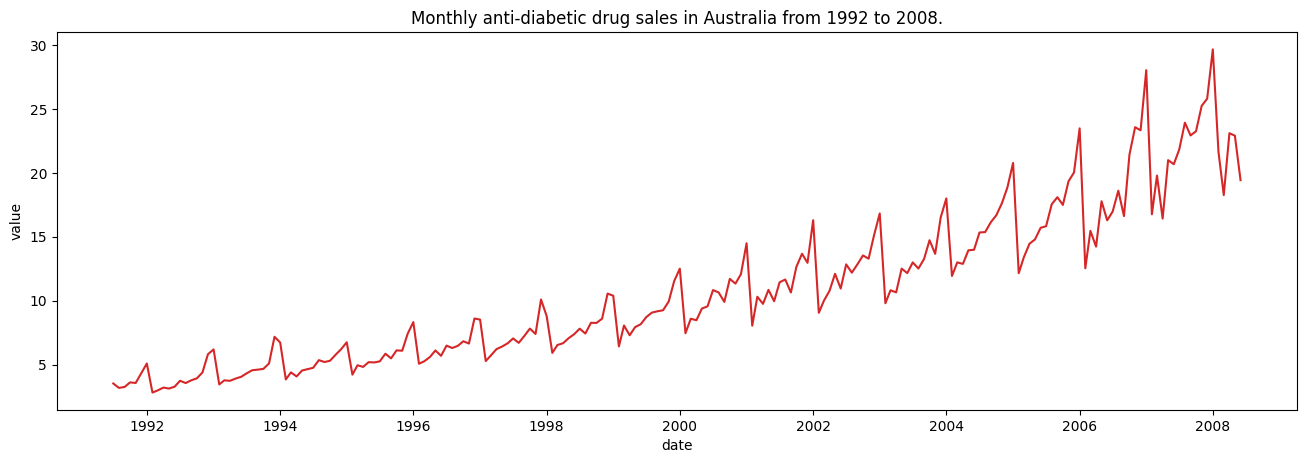

In [16]:
plot_df(df, x=df.index, y=df.value, title ="Monthly anti-diabetic drug sales in Australia from 1992 to 2008.")

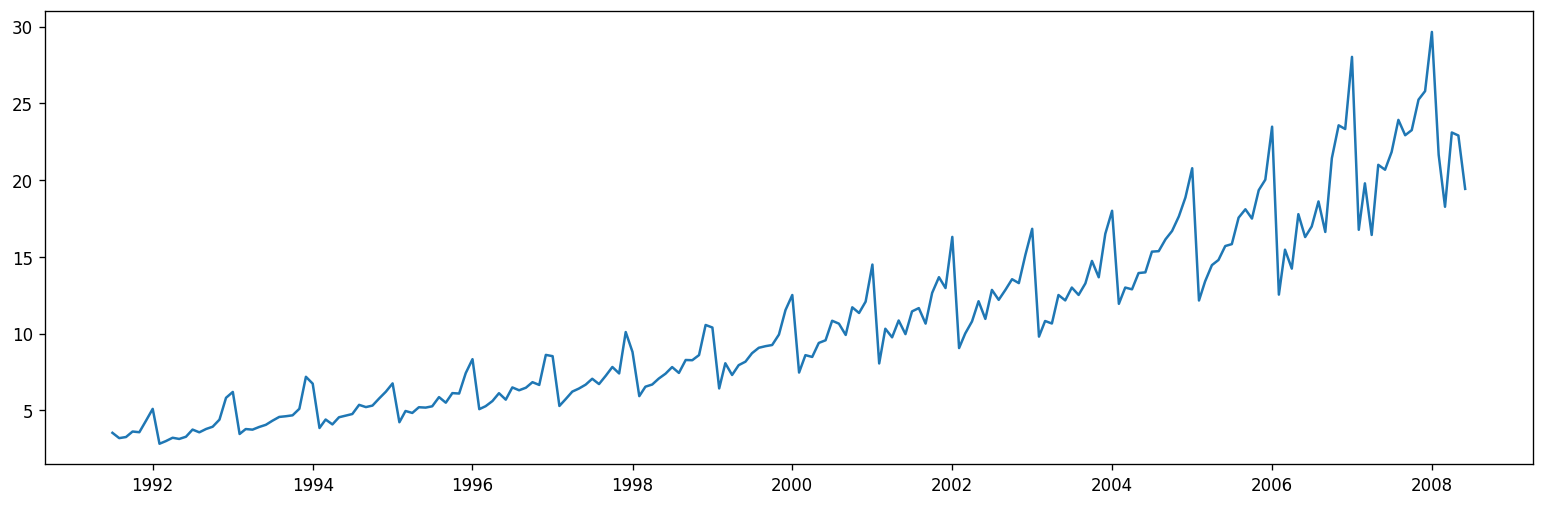

In [21]:
plt.figure(figsize = (16,5))
plt.plot(df.index,df.value)

In [ ]:
# since all values are positive, we can show this on both sides of the Y axis to emphasize the growth

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


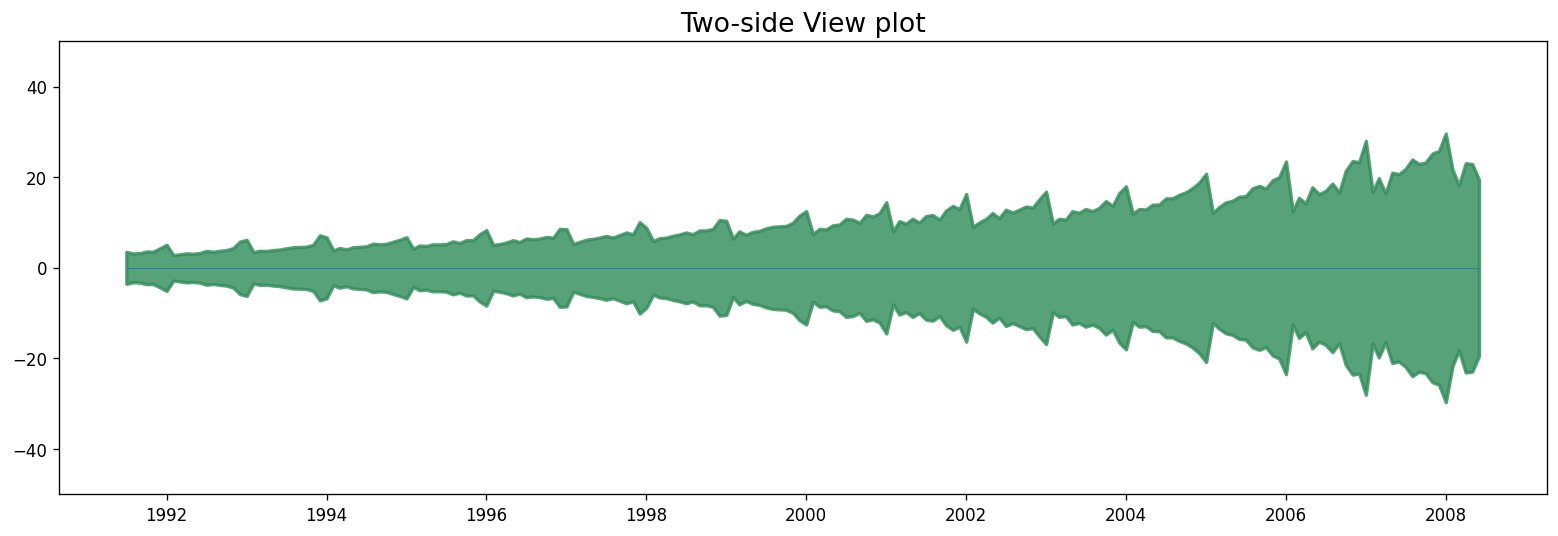

In [35]:
x = df['date'].values
y1 = df['value'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.8, linewidth=2, color='seagreen')
plt.ylim(-50, 50)
plt.title('Two-side View plot', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

### Seasonal Plot of a Time Series

In [ ]:
# since it is monthly time series. We can plot each year as a separate line in the same plot. 
# This lets us compare the year wise patterns side-by-side

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


### IMPORTANT !! HOW TO PREPARE DATA

In [45]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.month for d in df.date]
years = df['year'].unique()
df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,7
1,1991-08-01,3.180891,1991,8
2,1991-09-01,3.252221,1991,9
3,1991-10-01,3.611003,1991,10
4,1991-11-01,3.565869,1991,11


In [47]:
# pre colors 
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

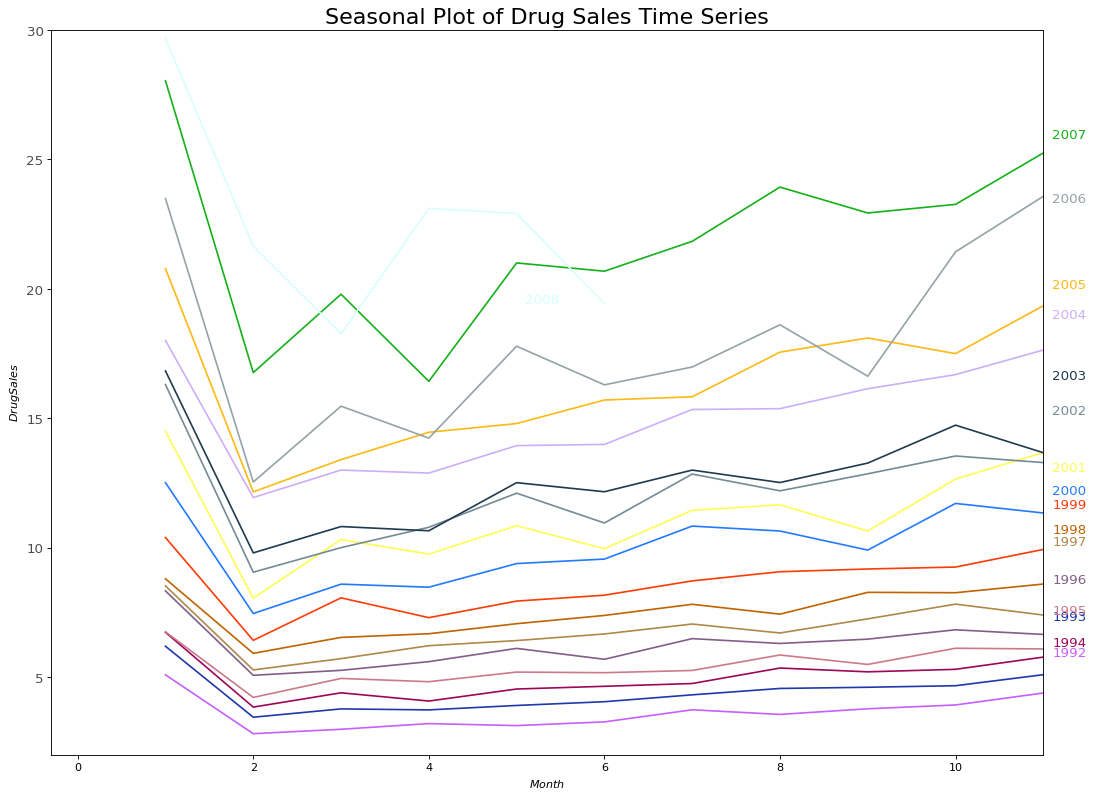

In [52]:
# Draw plot
plt.figure(figsize=(16,12), dpi = 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])
     # plt.text(): Add the text s to the Axes at location x, y in data coordinates.
    
# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

There is a steep fall in drug sales every February, rising again in March, falling again in April and so on. Clearly, the pattern repeats within a given year, every year.

However, as years progress, the drug sales increase overall.

You can nicely visualize this trend and how it varies each year in a nice year-wise boxplot. Likewise, you can do a month-wise boxplot to visualize the monthly distributions.

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [54]:
# prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


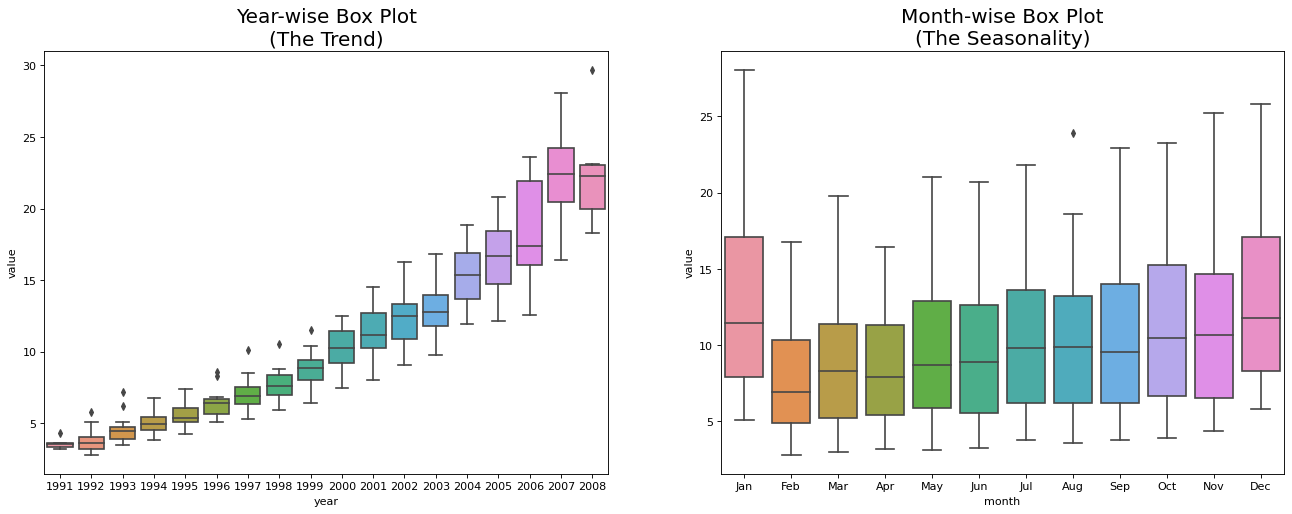

In [58]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
### plt.subplots: Create a figure and a set of subplots.
# plt.subplots(nrows= , ncols= ,)

sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# 5. patterns in a time series

Any time series may be split into the following components: 
##### Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. 

Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.



<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

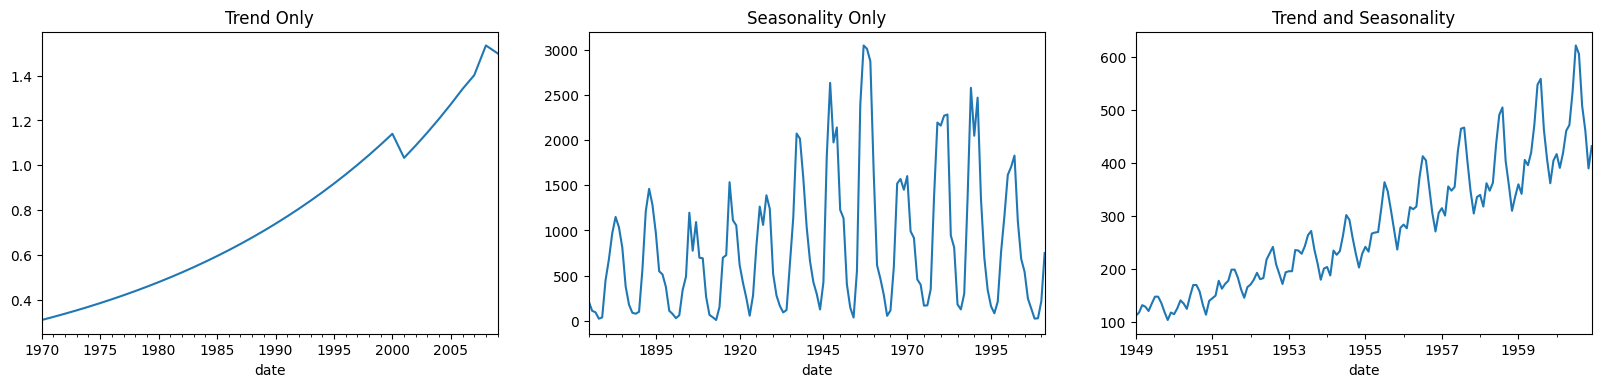

In [59]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

# 6. Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

### Additive time series:
Value = Base Level + Trend + Seasonality + Error

### Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

# 7. How to decompose a time series into its components?

The seasonal_decompose in statsmodels implements this conveniently.

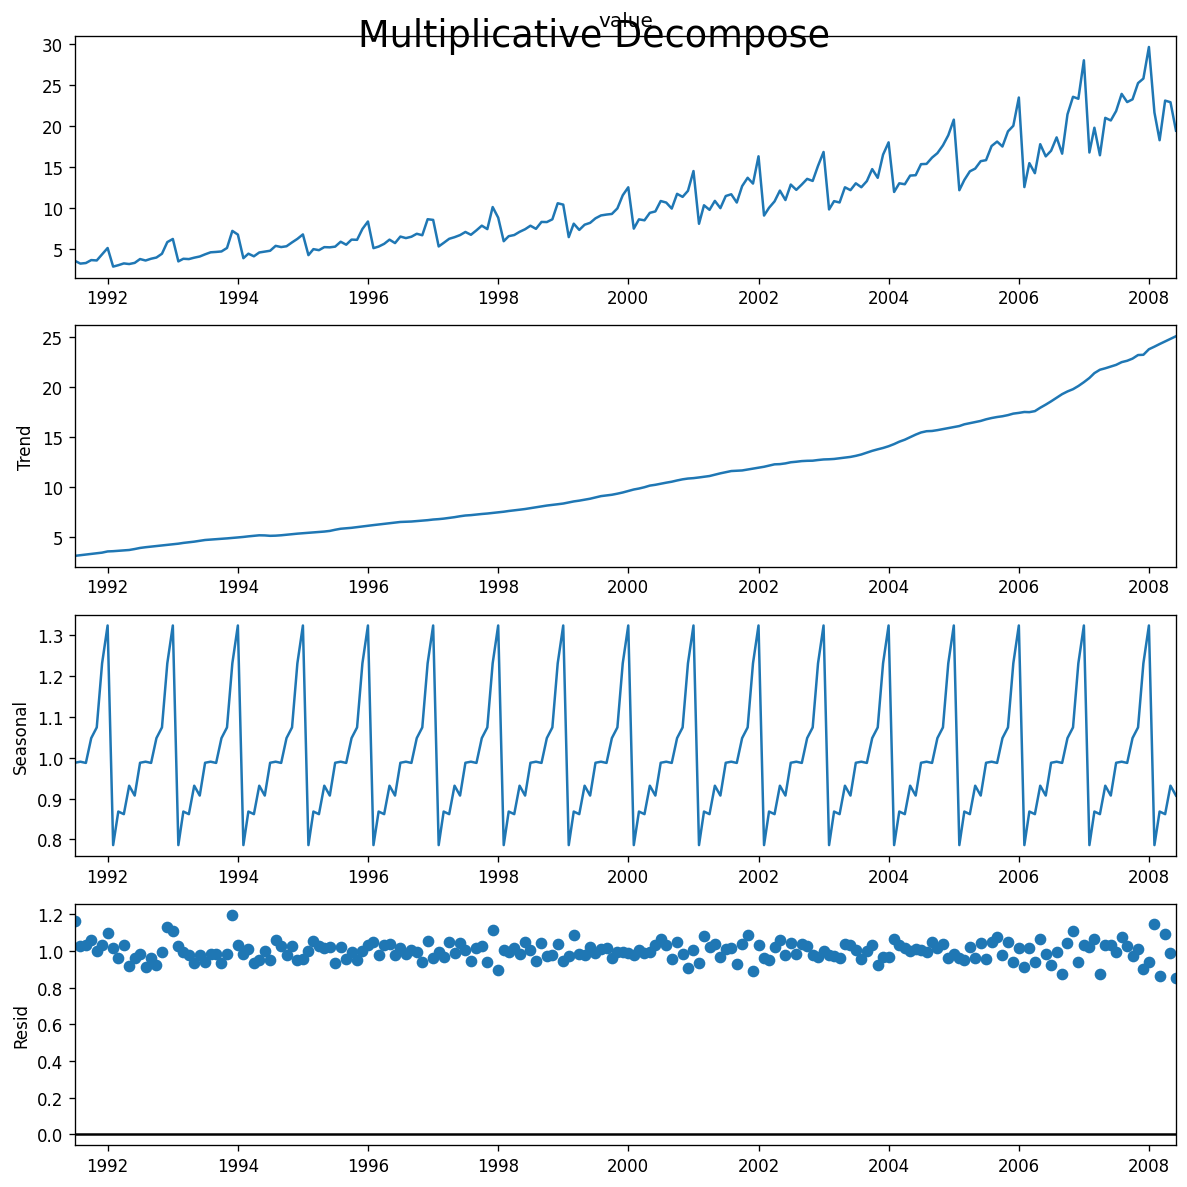

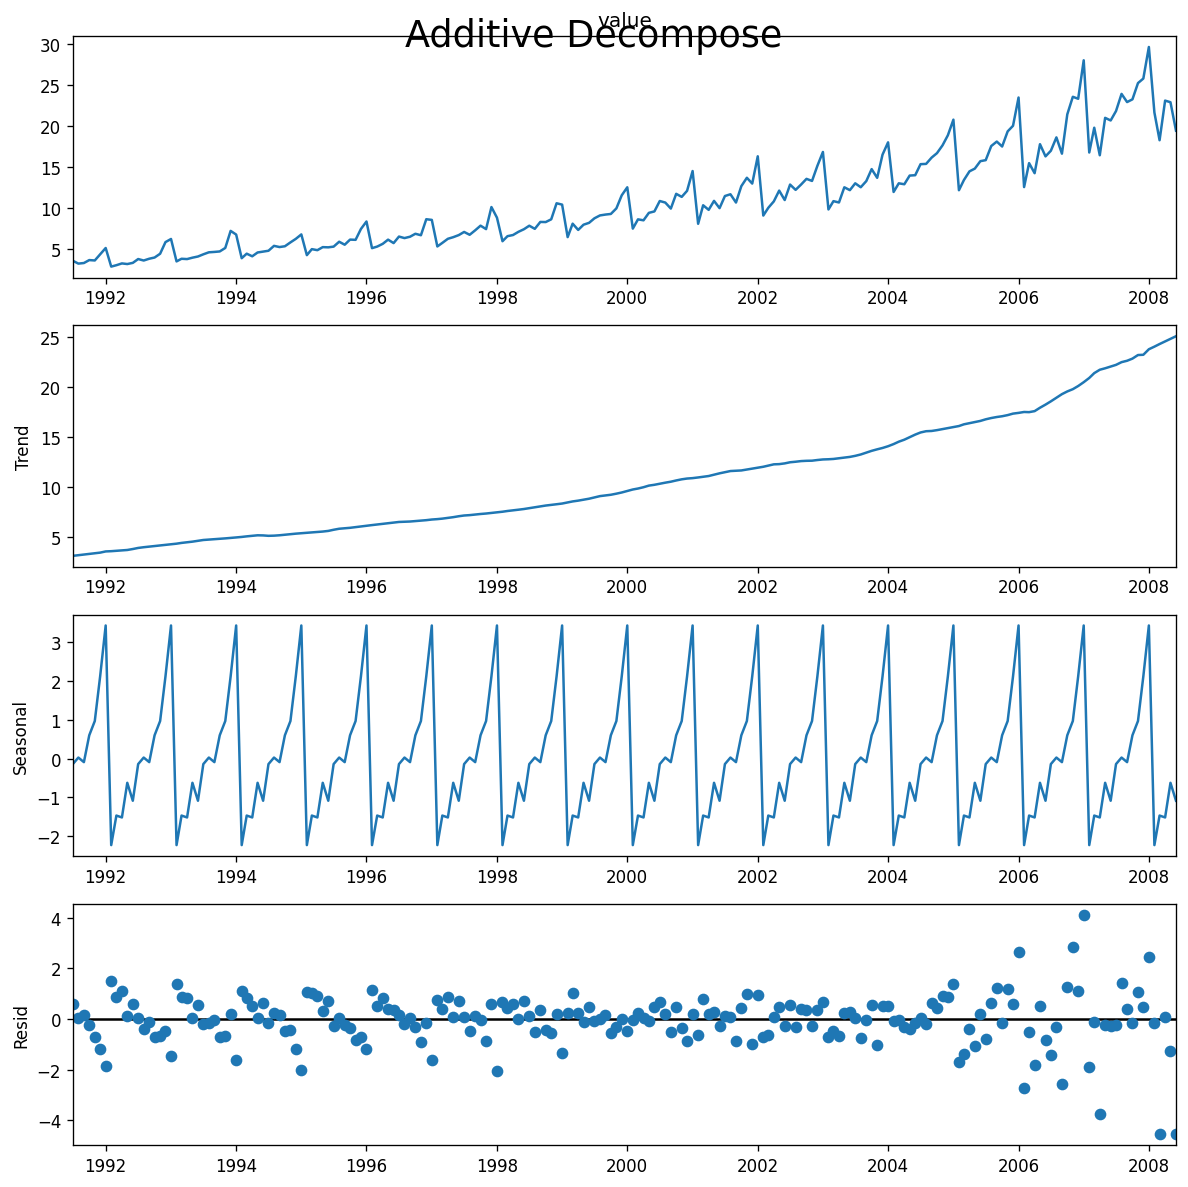

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()